In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('employee_attrition.csv')

In [3]:
# Basic EDA

In [4]:
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Education Level,Job Level,Company Size,Company Tenure,Leadership Opportunities,Company Reputation,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,Associate Degree,Mid,Medium,89,No,Excellent,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,Master’s Degree,Mid,Medium,21,No,Fair,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,Bachelor’s Degree,Mid,Medium,74,No,Poor,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,High School,Mid,Small,50,No,Good,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,High School,Senior,Medium,68,No,Fair,Stayed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       59598 non-null  int64 
 1   Gender                    59598 non-null  object
 2   Years at Company          59598 non-null  int64 
 3   Job Role                  59598 non-null  object
 4   Monthly Income            59598 non-null  int64 
 5   Work-Life Balance         59598 non-null  object
 6   Job Satisfaction          59598 non-null  object
 7   Performance Rating        59598 non-null  object
 8   Number of Promotions      59598 non-null  int64 
 9   Overtime                  59598 non-null  object
 10  Education Level           59598 non-null  object
 11  Job Level                 59598 non-null  object
 12  Company Size              59598 non-null  object
 13  Company Tenure            59598 non-null  int64 
 14  Leadership Opportuniti

In [6]:
df.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,38.565875,15.753901,7302.397983,0.832578,55.758415
std,12.079673,11.245981,2151.457423,0.994991,25.411090
min,18.000000,1.000000,1316.000000,0.000000,2.000000
25%,28.000000,7.000000,5658.000000,0.000000,36.000000
50%,39.000000,13.000000,7354.000000,1.000000,56.000000
75%,49.000000,23.000000,8880.000000,2.000000,76.000000
max,59.000000,51.000000,16149.000000,4.000000,128.000000


In [7]:
df.shape

(59598, 17)

In [8]:
# Data Preprocessing

In [9]:
df.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Education Level             0
Job Level                   0
Company Size                0
Company Tenure              0
Leadership Opportunities    0
Company Reputation          0
Attrition                   0
dtype: int64

In [10]:
df[df.duplicated()]

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Education Level,Job Level,Company Size,Company Tenure,Leadership Opportunities,Company Reputation,Attrition


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Job Role'] = LabelEncoder().fit_transform(df['Job Role'])
df['Work-Life Balance'] = LabelEncoder().fit_transform(df['Work-Life Balance'])
df['Job Satisfaction'] = LabelEncoder().fit_transform(df['Job Satisfaction'])
df['Performance Rating'] = LabelEncoder().fit_transform(df['Performance Rating'])
df['Overtime'] = LabelEncoder().fit_transform(df['Overtime'])
df['Job Level'] = LabelEncoder().fit_transform(df['Job Level'])
df['Company Size'] = LabelEncoder().fit_transform(df['Company Size'])
df['Leadership Opportunities'] = LabelEncoder().fit_transform(df['Leadership Opportunities'])
df['Company Reputation'] = LabelEncoder().fit_transform(df['Company Reputation'])
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df['Education Level'] = LabelEncoder().fit_transform(df['Education Level'])

In [13]:
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Education Level,Job Level,Company Size,Company Tenure,Leadership Opportunities,Company Reputation,Attrition
0,31,1,19,0,5390,0,2,0,2,0,0,1,1,89,0,0,1
1,59,0,4,3,5534,3,0,3,3,0,3,1,1,21,0,1,1
2,24,0,10,2,8159,2,0,3,0,0,1,1,1,74,0,3,1
3,36,0,7,0,3989,2,0,2,1,0,2,1,2,50,0,2,1
4,56,1,41,0,4821,1,3,0,0,1,2,2,1,68,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,0,12,0,4414,1,0,0,1,1,1,2,2,35,0,3,0
59594,18,1,4,2,8040,1,0,2,3,0,0,2,1,73,0,1,0
59595,22,0,14,4,7944,1,0,2,0,1,3,0,2,29,1,2,1
59596,23,1,8,0,2931,1,3,0,0,0,1,0,0,9,0,2,0


<Axes: >

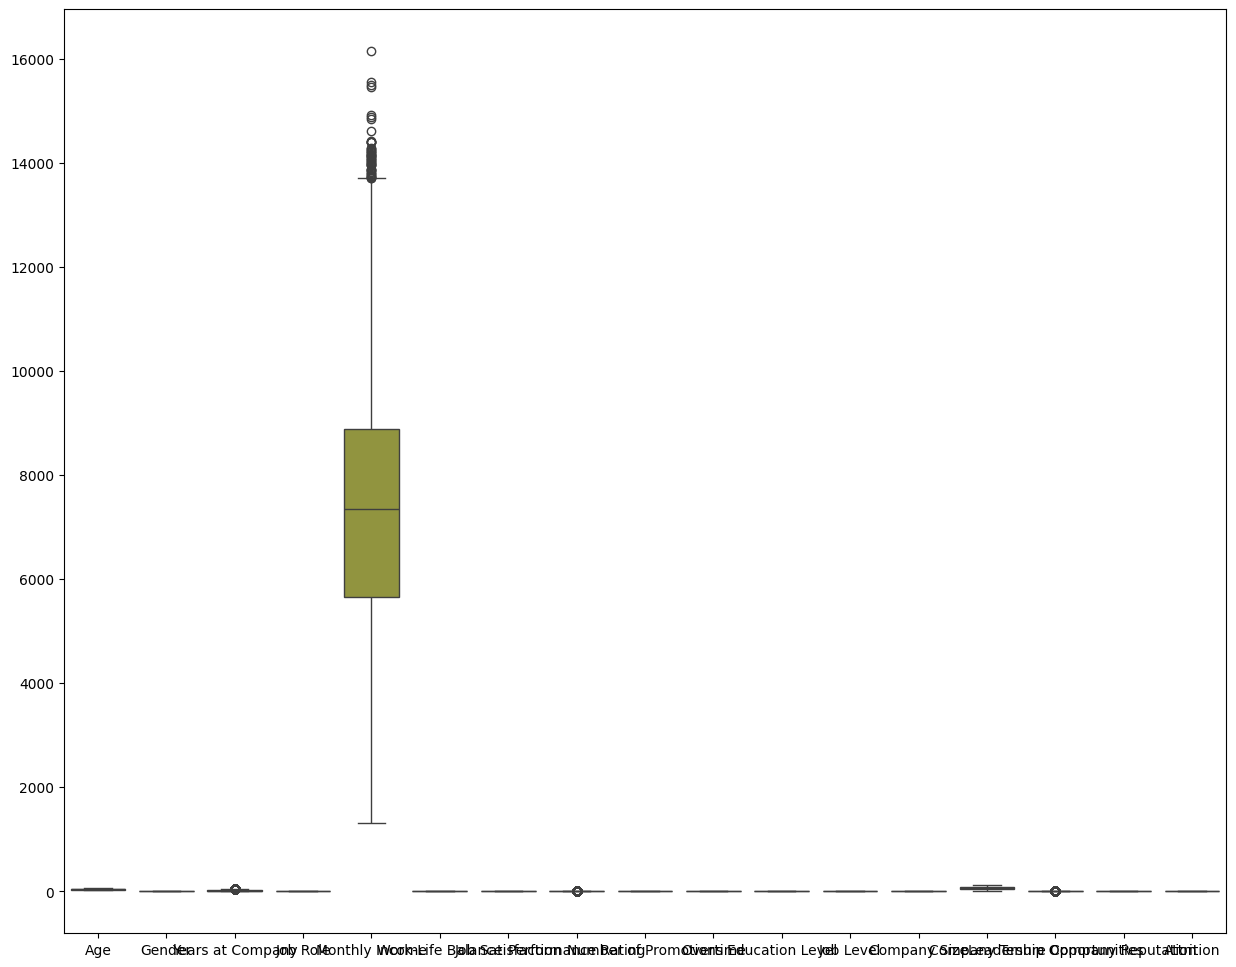

In [14]:
plt.figure(figsize=(15,12)) # Set the Width & Height
sns.boxplot(data=df)

In [15]:
# Detecting Actual Values of Outliers
def detect_outliers_iqr(data):
    outlier_list = []
    
    # Drop missing values
    data = data.dropna()
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3 - q1
    
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data: 
        if (i < lwr_bound or i > upr_bound):
            outlier_list.append(i)
    
    return outlier_list 

# Assuming df is your DataFrame
for i in df:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in", i, "attribute:", outliers)

Outliers in Age attribute: []
Outliers in Gender attribute: []
Outliers in Years at Company attribute: [48, 49, 49, 48, 48, 49, 50, 48, 50, 48, 48, 49, 48, 51, 48, 48, 51, 48, 48, 48, 48, 49, 49, 50, 51, 48, 48, 50, 48, 49, 48, 49, 48, 48, 49, 50, 48, 48, 48, 49, 49, 49, 48, 49, 50, 51, 49, 48, 51, 49, 49, 48, 50, 50, 49, 49, 49, 50, 48, 48, 48, 48, 48, 49, 48, 51, 48, 49, 50, 49, 48, 48, 48, 49, 51, 48, 50, 50, 50, 50, 50, 48, 49, 48, 49, 49, 50, 49, 51, 48, 50, 49, 48, 48, 50, 48, 49, 48, 48, 48, 48, 50, 51, 49, 49, 49, 48, 51, 48, 49, 49, 50, 50, 48, 51, 49, 49, 48, 48, 48, 48, 49, 50, 49, 48, 49, 50, 48, 48, 49, 48, 49, 48, 48, 51, 49, 50, 48, 48, 48, 50, 48, 51, 50, 48, 49, 49, 49, 51, 49, 48, 49, 51, 48, 50, 50, 49, 48, 48, 48, 49, 48, 48, 51, 48, 49, 48, 48, 48, 49, 48, 51, 49, 49, 48, 48, 50, 48, 48, 49, 48, 48, 49, 49, 50, 50, 49, 48, 49, 48, 48, 48, 50, 51, 50, 49, 48, 50, 50, 48, 48, 50, 49, 49, 48, 49, 48, 48, 48, 49, 49, 48, 48, 49, 49, 49, 51, 48, 51, 48, 49, 49, 48, 50, 

In [16]:
# Remove Outlier
def handle_outliers(data):
    # Compute percentiles
    tenth_percentile = np.percentile(data.dropna(), 10)
    ninetieth_percentile = np.percentile(data.dropna(), 90)
    
    # Handle outliers by capping
    data = np.where(data < tenth_percentile, tenth_percentile, data)
    data = np.where(data > ninetieth_percentile, ninetieth_percentile, data)
    
    return data

# Assuming df is your DataFrame
for i in df:
    df[i] = handle_outliers(df[i])

<Axes: >

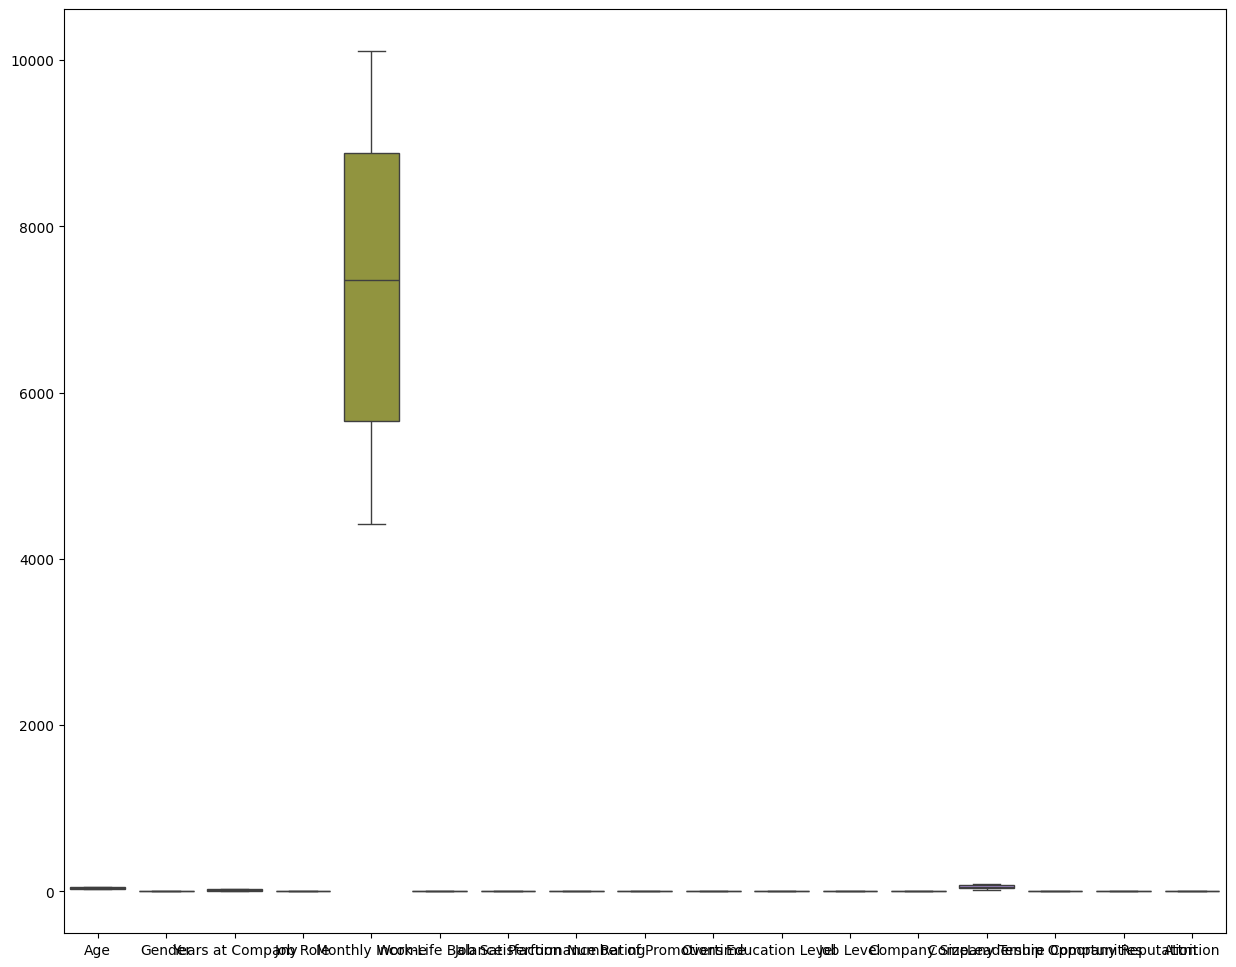

In [17]:
plt.figure(figsize=(15,12)) # Set the Width & Height
sns.boxplot(data=df)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target variable

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)


In [20]:
# Initialize Logistic Regression
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")


Logistic Regression Performance:
Accuracy: 0.6425
Precision: 0.6421
Recall: 0.6425
F1 Score: 0.6420
------------------------------


In [21]:
# Initialize Naive Bayes
nb = GaussianNB()

# Fit the model
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_nb, "Naive Bayes")


Naive Bayes Performance:
Accuracy: 0.6454
Precision: 0.6468
Recall: 0.6454
F1 Score: 0.6456
------------------------------


In [22]:
# Initialize SVM
svm = SVC()

# Fit the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")


Support Vector Machine Performance:
Accuracy: 0.5246
Precision: 0.2752
Recall: 0.5246
F1 Score: 0.3610
------------------------------


In [23]:
# Initialize KNN
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")


K-Nearest Neighbors Performance:
Accuracy: 0.5087
Precision: 0.5078
Recall: 0.5087
F1 Score: 0.5081
------------------------------


In [24]:
# Initialize Decision Tree
dt = DecisionTreeClassifier()

# Fit the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_dt, "Decision Tree")


Decision Tree Performance:
Accuracy: 0.5882
Precision: 0.5884
Recall: 0.5882
F1 Score: 0.5883
------------------------------


In [25]:
# Initialize Random Forest
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_rf, "Random Forest")


Random Forest Performance:
Accuracy: 0.6610
Precision: 0.6615
Recall: 0.6610
F1 Score: 0.6611
------------------------------


In [26]:
# Initialize AdaBoost
ada = AdaBoostClassifier()

# Fit the model
ada.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_ada, "AdaBoost")


AdaBoost Performance:
Accuracy: 0.6818
Precision: 0.6820
Recall: 0.6818
F1 Score: 0.6819
------------------------------


In [28]:
import pandas as pd

# Dictionary to store the results for each algorithm
performance_results = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# List of algorithm names and predictions
algorithms = [
    ("Logistic Regression", y_pred_log_reg),
    ("Naive Bayes", y_pred_nb),
    ("Support Vector Machine", y_pred_svm),
    ("K-Nearest Neighbors", y_pred_knn),
    ("Decision Tree", y_pred_dt),
    ("Random Forest", y_pred_rf),
    ("AdaBoost", y_pred_ada)
]

# Loop through each algorithm's results
for model_name, y_pred in algorithms:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the results to the dictionary
    performance_results['Algorithm'].append(model_name)
    performance_results['Accuracy'].append(accuracy)
    performance_results['Precision'].append(precision)
    performance_results['Recall'].append(recall)
    performance_results['F1 Score'].append(f1)

# Convert the results dictionary to a DataFrame for easy viewing
performance_df = pd.DataFrame(performance_results)

# Display the results
print(performance_df)


                Algorithm  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.642534   0.642052  0.642534  0.642030
1             Naive Bayes  0.645386   0.646848  0.645386  0.645595
2  Support Vector Machine  0.524581   0.275185  0.524581  0.360997
3     K-Nearest Neighbors  0.508725   0.507823  0.508725  0.508095
4           Decision Tree  0.588171   0.588410  0.588171  0.588272
5           Random Forest  0.660990   0.661450  0.660990  0.661135
6                AdaBoost  0.681795   0.681994  0.681795  0.681873


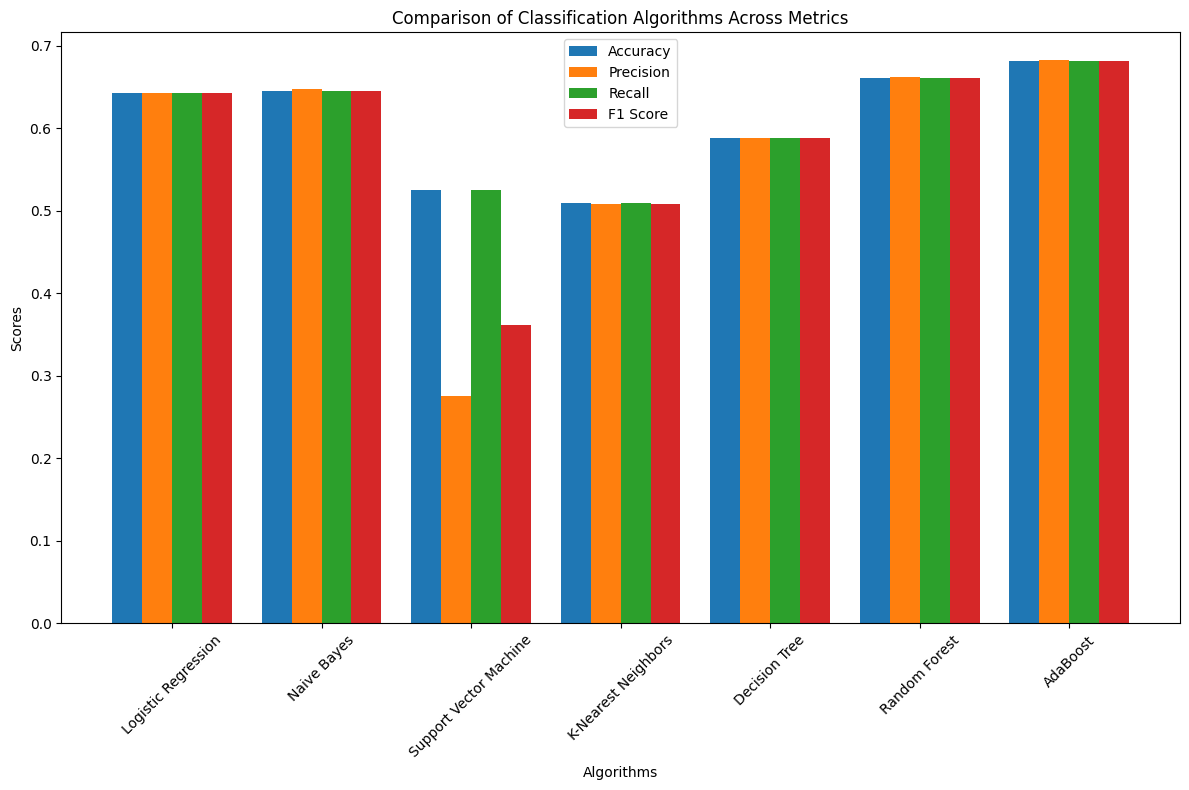

In [29]:
plt.figure(figsize=(12, 8))

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colors for each metric

# Set the bar width
bar_width = 0.2

# Set up the positions for each group of bars
index = np.arange(len(performance_df['Algorithm']))

# Plotting each metric as a grouped bar
for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, performance_df[metric], bar_width, label=metric, color=colors[i])

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Comparison of Classification Algorithms Across Metrics')

# Setting the x-ticks and labels
plt.xticks(index + bar_width * 1.5, performance_df['Algorithm'], rotation=45)

# Adding a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()